# Projet Master HPC-IA Mines ParisTech
### _Cours de probas-stats avec le Professeur Miguel Munoz Zuniga_

## **Problème 1** : Comparaison entre les méthodes des moments et de vraissemblance maximale

Soit la variable aléatoire X suivant comme fonction de densité de probabilité :
$$
f(x) = \frac{1}{\alpha}e^{-\frac{x-m}{\alpha}}e^{-e^{-\frac{x-m}{\alpha}}}
$$
Avec $m$ et $\alpha$ > 0 deux paramètres inconnus.

### 1. Vérifions que $f$ est une fonction de densité de probabilité valide.
Pour cela, nous devons prouver que :
$$
\int_{-\infty}^{\infty} f(x) \; dx = 1
$$
- Posons : 
    - $v(x) = -\frac{x-m}{\alpha}$
    - $u(x) = -e^{-\frac{x-m}{\alpha}} = -e^{v(x)}$
- Nous avons donc : 
  - $v'(x) = \frac{1}{\alpha}$
  - $u'(x) = -v'(x)e^{v(x)}$
- Ainsi :
  - $f(x) = u'(x)e^{u(x)}$
- Nous pouvons donc trouver facilement une primitive, qui nous aidera dans le calcul de l'intégrale :
  - $F(x) = e^{-e^{-\frac{x-m}{\alpha}}} = e^{u(x)}$

Revenons au problème initial donc prouver que $\int_{-\infty}^{\infty} f(x) \; dx = 1$ :
$$
\begin{align}
\int_{-\infty}^{\infty} f(x) \; dx &= \lim\limits_{\substack{a \rightarrow -\infty \\ b \rightarrow +\infty}} [f(x)]_a^b \\
&= \lim\limits_{\substack{a \rightarrow -\infty \\ b \rightarrow +\infty}} F(b) - F(a) \\
&= \lim\limits_{\substack{a \rightarrow -\infty \\ b \rightarrow +\infty}} e^{-e^{-\frac{b-m}{\alpha}}} - e^{-e^{-\frac{a-m}{\alpha}}} \\
\text{A l'infini, }\alpha\text{ et }m&\text{ sont négligeable, donc :} \\
&= \lim\limits_{\substack{a \rightarrow -\infty \\ b \rightarrow +\infty}} e^{-e^{-b}} - e^{-e^{-a}} \\
&= \lim\limits_{\substack{a \rightarrow -\infty \\ b \rightarrow +\infty}} e^{0} - e^{-\infty} \\
&= \lim\limits_{\substack{a \rightarrow -\infty \\ b \rightarrow +\infty}} 1 - 0 \\
&= 1 \\
\end{align}
$$

**La fonction $f$ est donc bien une fonction de densité de probabilité valide.** <br>
Vérifions empiriquement avec python, dans un premier temps, affichons la fonction de densité :

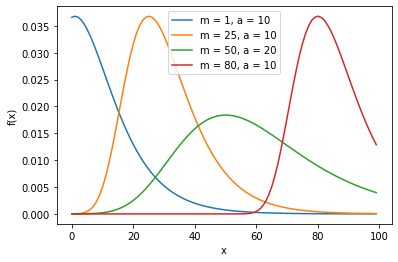

In [2]:
from scipy.integrate import quad
import matplotlib.pyplot as plt
import itertools 
from math import exp

_alpha = 10
_m = 49

def f(x, alpha=_alpha,m=_m) :
    return (1/alpha) * exp(-((x-m)/alpha)) * exp(-exp(-((x-m)/alpha)))

alphas = [10, 10, 20, 10]
ms = [1, 25, 50, 80]

xs = range(0, 100)
ys = []
for i in range(len(alphas)) :
    a = alphas[i]
    m = ms[i]
    ys.append([f(x,alpha=a,m=m) for x in xs])


plt.plot(xs,ys[0], label="m = 1, a = 10")
plt.plot(xs,ys[1], label="m = 25, a = 10")
plt.plot(xs,ys[2], label="m = 50, a = 20")
plt.plot(xs,ys[3], label="m = 80, a = 10")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

Maintenant, en calculant numériquement l'aire sous la courbe entre une borne de plus en plus grande, nous voyons vite que le résultat converge vers 1 :

In [3]:
b_inf = [-1, -10, -100, -1000]
b_sup = [1, 10, 100, 1000]

res = [quad(f, inf, sup) for (inf, sup) in zip(b_inf, b_sup)]

for r, inf, sup in zip(res, b_inf, b_sup) :
    print("Aire sous la courbe de {} à {} : {}".format(inf, sup, r[0]))
# print('aire sous la courbe de -1000 a 1000 : ', res)

Aire sous la courbe de -1 à 1 : 4.771882121018131e-59
Aire sous la courbe de -10 à 10 : 1.942337605016799e-24
Aire sous la courbe de -100 à 100 : 0.9932847020678415
Aire sous la courbe de -1000 à 1000 : 1.000000000000003
